In [1]:
# import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Inspect the columns and data type for each table
print("-"*20)
inspector = inspect(engine)
for x in inspector.get_table_names():
    print(f'Table: {x}\n{"-"*20}')
    for y in inspector.get_columns(x):
        print(y["name"], y["type"])
    print("-"*20)

--------------------
Table: measurement
--------------------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
--------------------
Table: station
--------------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
--------------------


In [11]:
# Find the most recent date in the data set
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data
last_year = session.query(Measurement.date).filter(Measurement.date >= '2016-08-23')\
                .order_by(Measurement.date).all()

In [13]:
# Perform a query to retrieve the data and precipitation scores
date_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23')\
                .order_by(Measurement.date).all()

In [14]:
# Perform a query to retrieve the data and precipitation scores
date_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23')\
                .order_by(Measurement.date).all()

In [15]:
## Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_precip)
df.columns = ["date", "precipitation"]
df = df.dropna()
df.set_index("date")

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


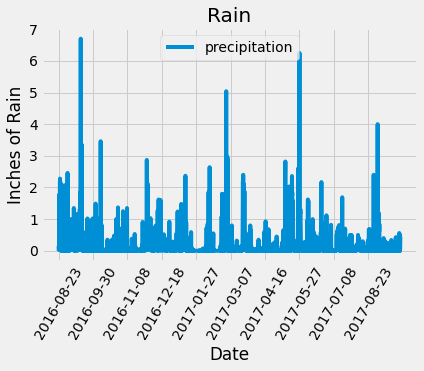

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="line")
x_spaces = np.linspace(0, len(df)-1, num=10)
x_names = [df["date"].tolist()[int(x)] for x in x_spaces]
plt.xticks(x_spaces, x_names, rotation=60)
plt.xlabel("Date")
plt.ylabel("Inches of Rain")
plt.title("Rain")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [19]:
# Design a query to find the most active stations
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).first()

('USC00519281', 2772)

In [20]:
## Using the most active station id from the previous query,calculate the lowest, highest, and average temperature
session.query(Station.id, func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp))\
    .where(Station.station == 'USC00519281').all()

C:\Users\joeln\anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:362: SAWarning: SELECT statement has a cartesian product between FROM element(s) "station" and FROM element "measurement".  Apply join condition(s) between each element to resolve.
  util.warn(message)


[(7, 0.0, 11.53, 0.16064353974479206)]

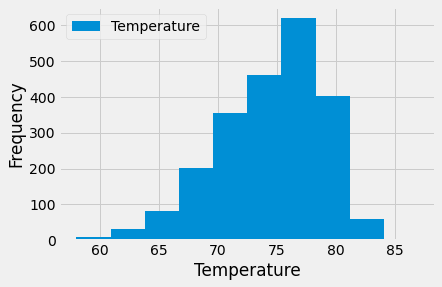

In [21]:
# Using the most active station id query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Station.id, Measurement.tobs).filter(Measurement.date >= '2016-08-23').where(Station.id == 7).all()
df = pd.DataFrame(temps)
df.columns = ["Station ID", "Temperature"]
df = df.set_index("Station ID")
df.plot(kind="hist")
plt.xlabel("Temperature")
plt.show()

In [22]:
# Close Session
session.close()